In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.transform import rescale

In [2]:
cap = cv2.VideoCapture("test.mpg")
cap.set(1,75000) ##read certain frame 

success,image = cap.read()
count = 0


### Thresholding function from Anwar's notebook:

In [3]:
def threshold_image(img, threshold):
    segmented_img_list = []
    
    if len(img) == 0:
        return "The threshold_image function did not recieve any input."
    
    elif len(img) == 1:
        ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
        segmented_img_list.append(thresh)
        
    else:
        for image in img:
            ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
            segmented_img_list.append(thresh)
        
    return np.array(segmented_img_list)

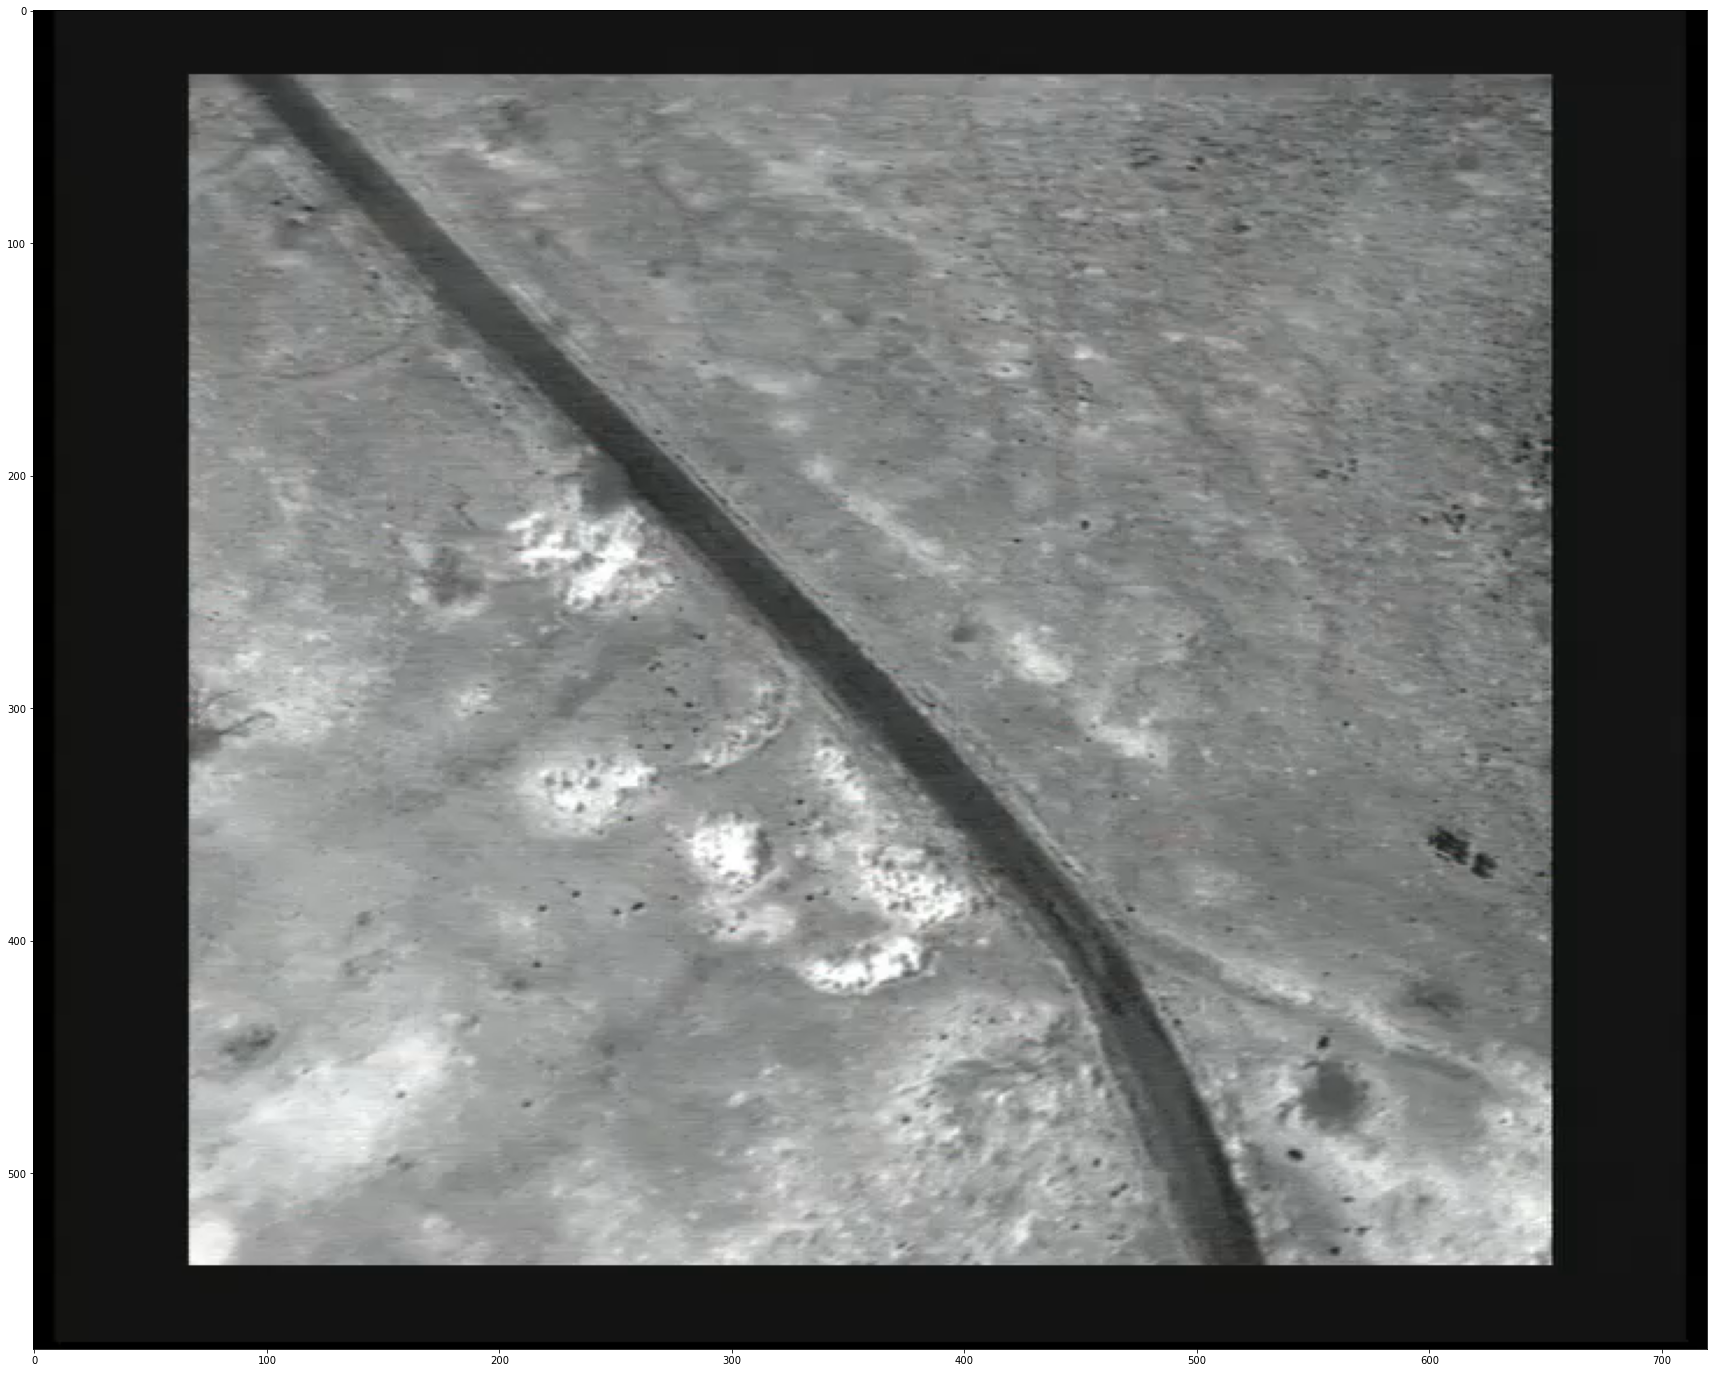

In [4]:
plt.figure(figsize = (30,25))
plt.imshow(image)

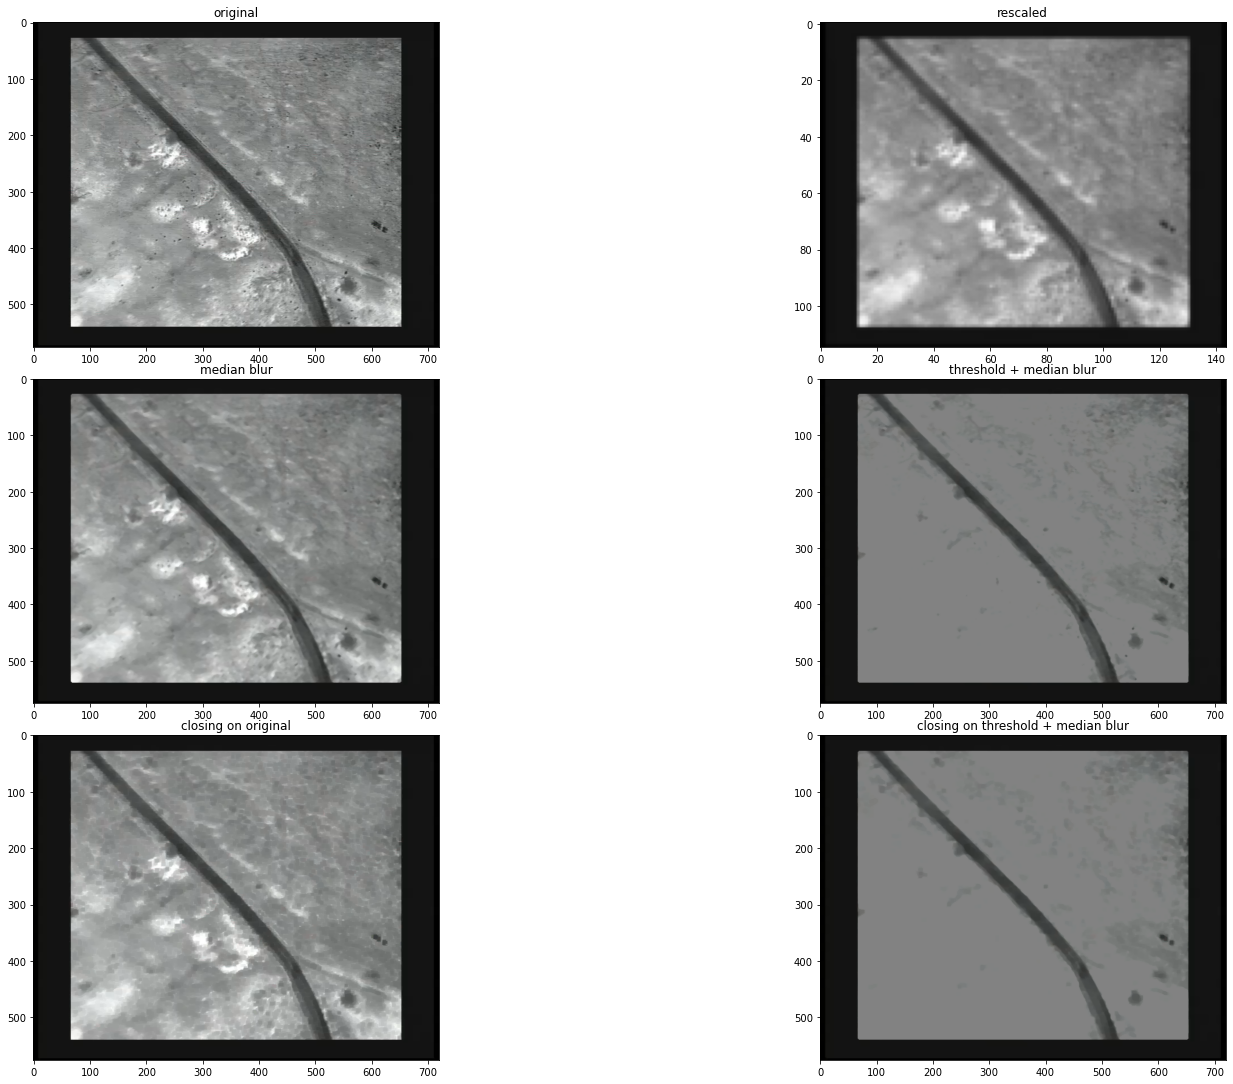

In [5]:
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
kernel = np.ones((5,5),np.uint8)


image_rescaled = rescale(image, 0.20, anti_aliasing= True)
#sharp = cv2.filter2D(image_rescaled, -1, kernel)

mblur = cv2.medianBlur(image, 5)
thresh = threshold_image(mblur, 130)

# dilation + erosion
close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
close_thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(3, 2, figsize=(22,15))
fig.tight_layout()
ax[0,0].imshow(image, cmap='gray')
ax[0,0].title.set_text('original')
ax[0,1].imshow(image_rescaled, cmap='gray')
ax[0,1].title.set_text('rescaled')
ax[1,0].imshow(mblur, cmap='gray')
ax[1,0].title.set_text('median blur')
ax[1,1].imshow(thresh, cmap='gray')
ax[1,1].title.set_text('threshold + median blur')
ax[2,0].imshow(close, cmap='gray')
ax[2,0].title.set_text('closing on original')
ax[2,1].imshow(close_thresh, cmap='gray')
ax[2,1].title.set_text('closing on threshold + median blur')
